Link - https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/cardekho_data.csv

### Importing the Libraries

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### Importing the Data

In [159]:
df = pd.read_csv("https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/cardekho_data.csv")

### Data Analysis
- EDA,DE, DM DC,DV,

In [160]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [161]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [162]:
print(f'Total numbers of rows and columns contain{df.shape}')

Total numbers of rows and columns contain(301, 9)


In [163]:
# Checking the types of Fuel,Sellers, Transmission and Owner
print(f'Fuel Type {df.Fuel_Type.unique()}')
print(f'Seller Type {df.Seller_Type.unique()}')
print(f'Transmission Type {df.Transmission.unique()}')
print(f"Owner Type {df.Owner.unique()}")

Fuel Type ['Petrol' 'Diesel' 'CNG']
Seller Type ['Dealer' 'Individual']
Transmission Type ['Manual' 'Automatic']
Owner Type [0 1 3]


In [164]:
# Checking the null values.
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [166]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [167]:
# As our data is little bit old so we want to know How old the carr is from current year.
df['Current_Year'] = 2023
df['No._of_Years'] = df['Current_Year'] - df.Year
df.head() 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No._of_Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [168]:
# Droping off few columns which are not required further.
df.drop(columns=["Car_Name", "Year", 'Current_Year'],axis=1, inplace = True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No._of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [169]:
# Now changing the Categorical Columns into numerical
# we can use get_dummies and OneHotEncoder
df = pd.get_dummies(df)
# from sklearn.preprocessing import OneHotEncoder

In [170]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,No._of_Years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,9,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,10,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,6,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,12,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,9,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,7,0,1,0,1,0,0,1
297,4.00,5.90,60000,0,8,0,0,1,1,0,0,1
298,3.35,11.00,87934,0,14,0,0,1,1,0,0,1
299,11.50,12.50,9000,0,6,0,1,0,1,0,0,1


In [171]:
# We are droping few columns as if it there or not the meaning will be the same.
df.drop(columns=['Fuel_Type_CNG','Seller_Type_Dealer','Transmission_Automatic'],axis = 1, inplace=True)

In [172]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No._of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [173]:
df.shape

(301, 9)

In [174]:
# Checking the relationship of whole data
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No._of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No._of_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


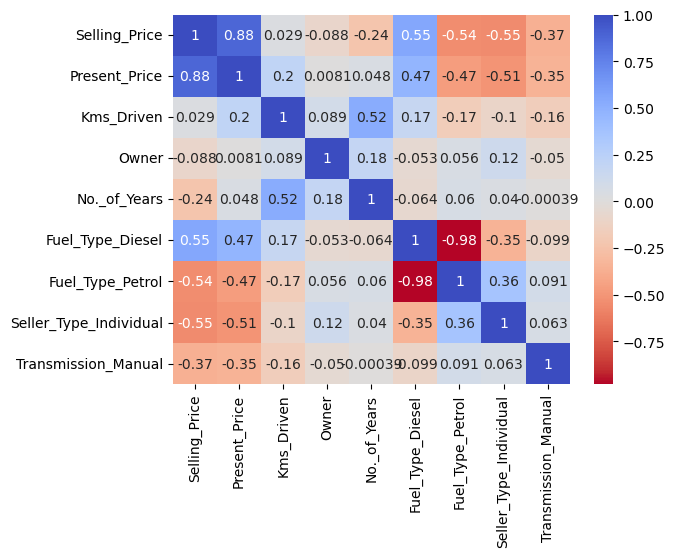

In [175]:
# Graphical view of Relationship for better undersanding.
sns.heatmap(df.corr(), annot=True, cmap = "coolwarm_r");

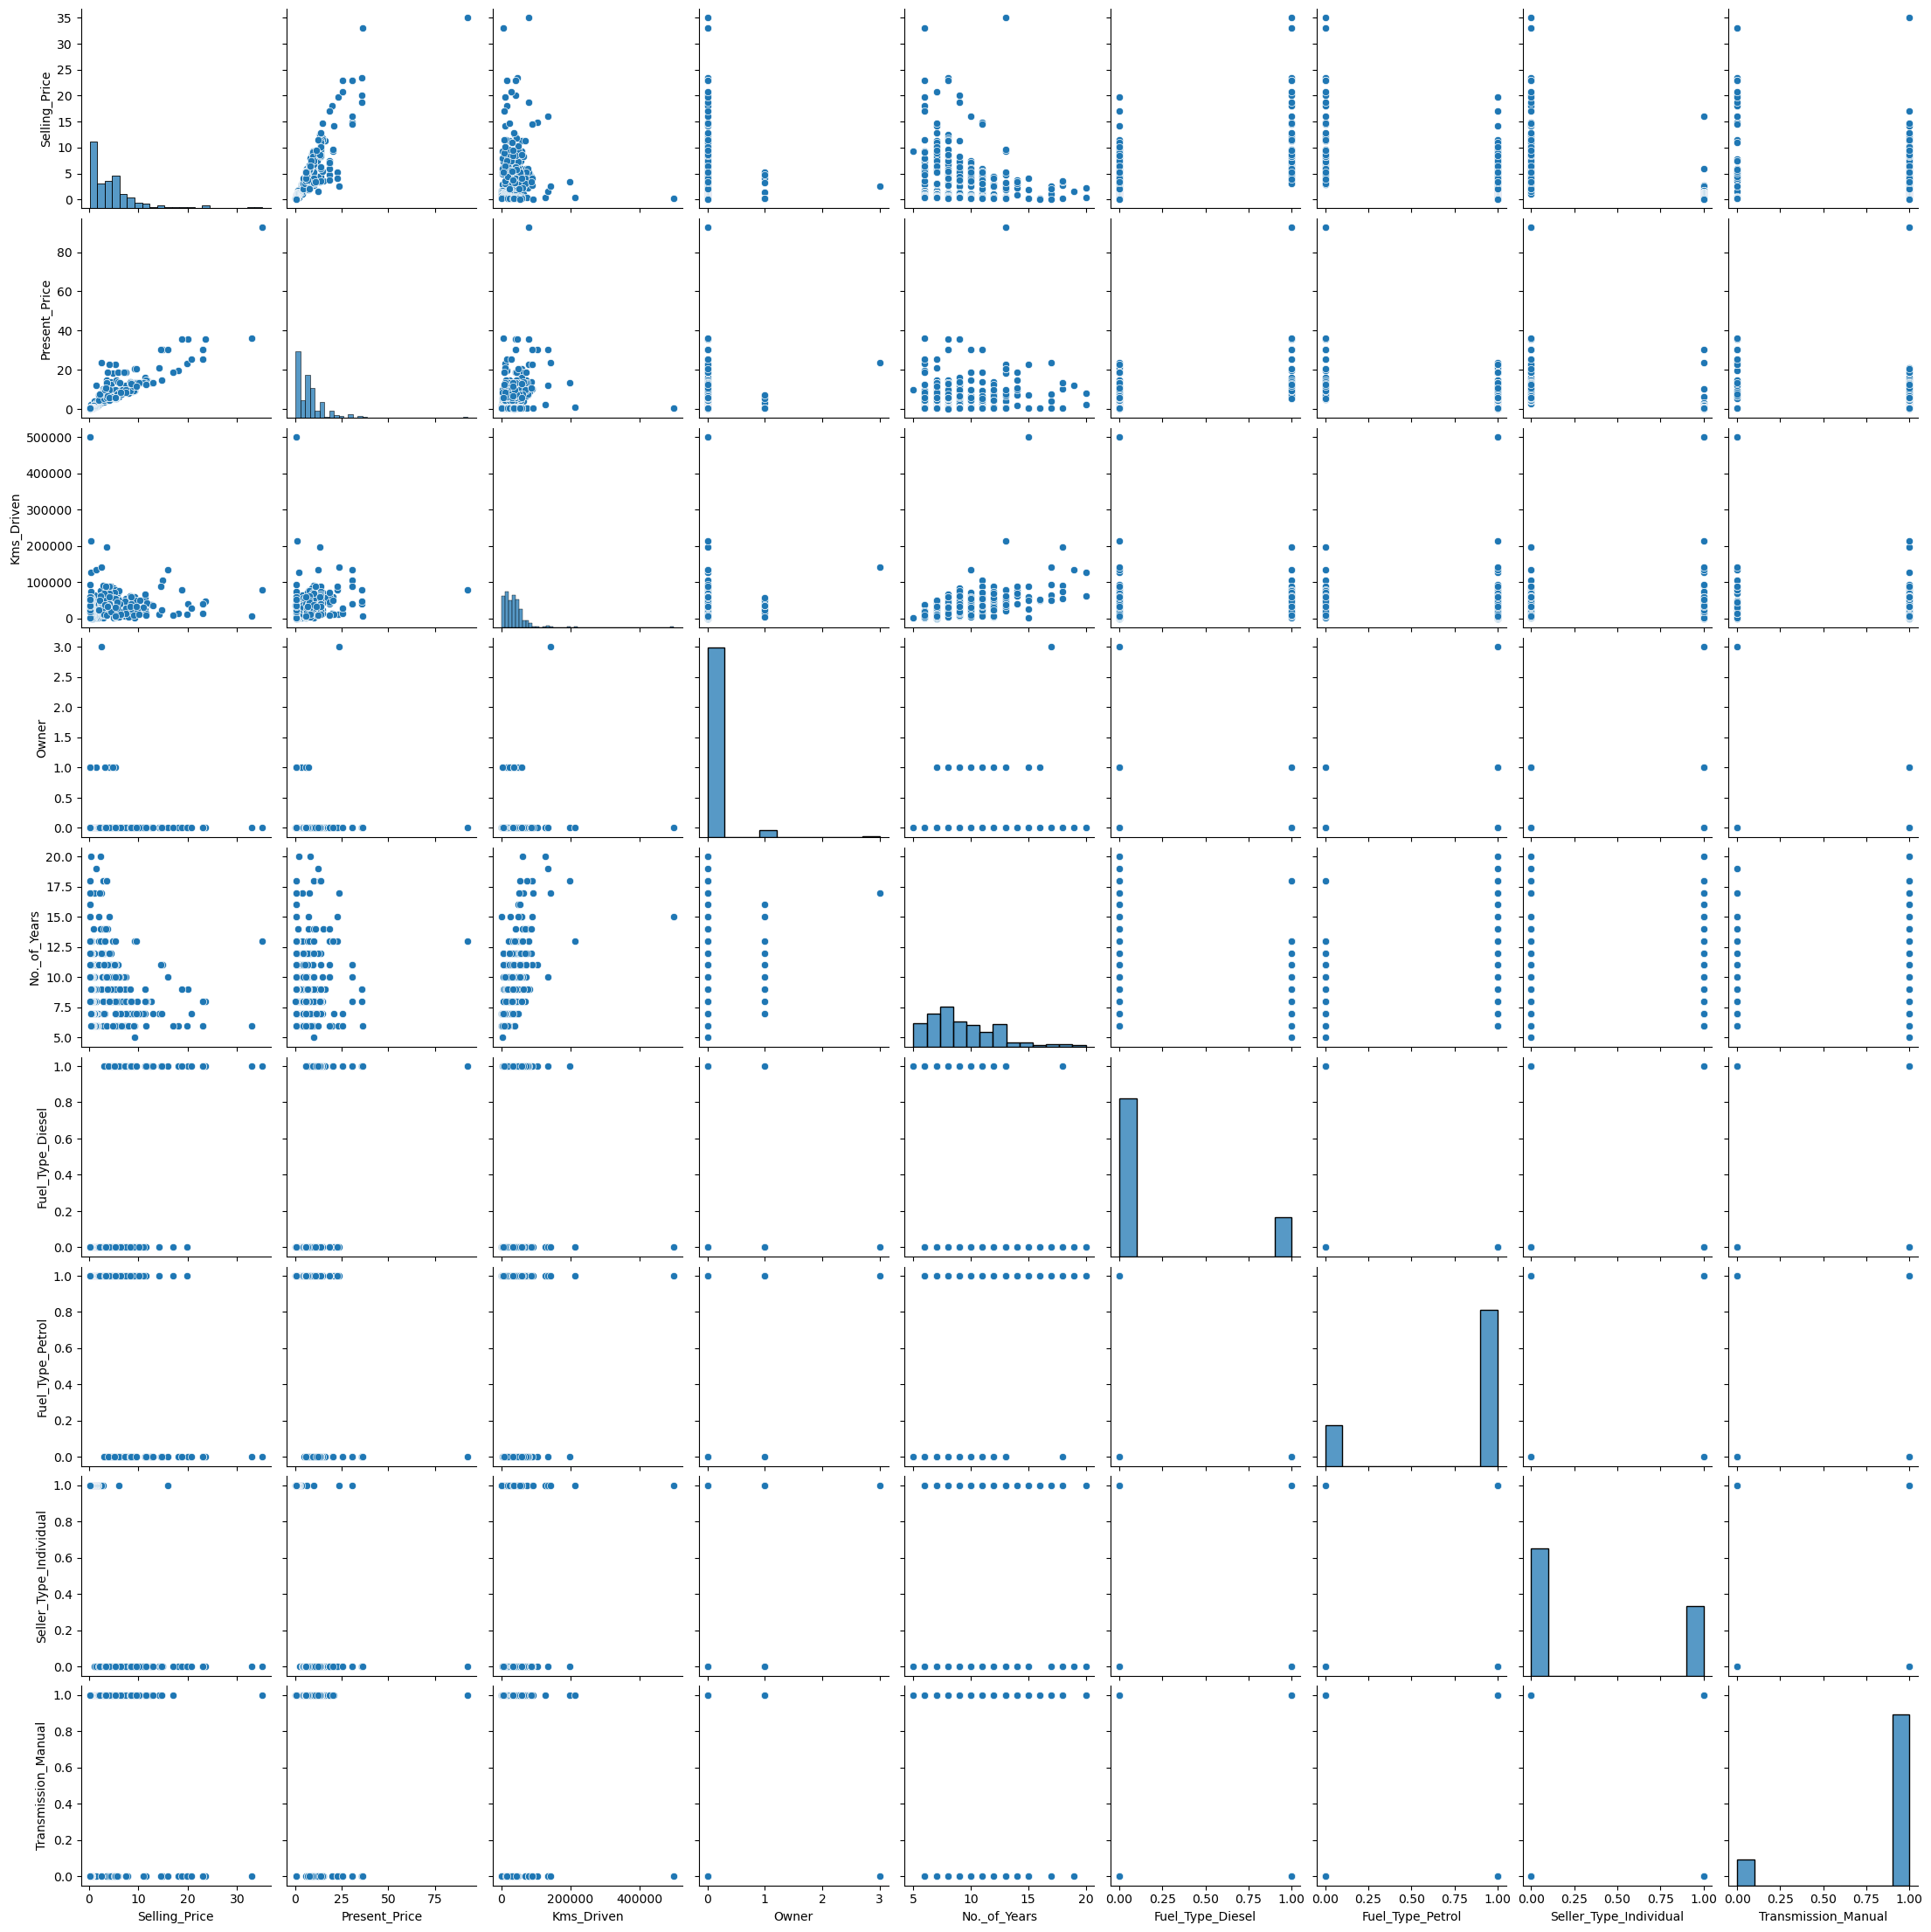

In [176]:
sns.pairplot(df);

### Assigning the Features and Targets

## Linear Regression

In [177]:
X = np.array(df.iloc[:,1:])
y = np.array(df.iloc[:,0])

In [178]:
X

array([[5.5900e+00, 2.7000e+04, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [9.5400e+00, 4.3000e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [9.8500e+00, 6.9000e+03, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [1.1000e+01, 8.7934e+04, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.2500e+01, 9.0000e+03, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.9000e+00, 5.4640e+03, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [179]:
y

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  2.85,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  7.25,  7.75,
        3.25,  2.65,  2.85,  4.9 ,  4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,
        6.  ,  1.95,  7.45,  3.1 ,  2.35,  4.95,  6.  ,  5.5 ,  2.95,
        4.65,  0.35,  3.  ,  2.25,  5.85,  2.55,  1.95,  5.5 ,  1.25,
        7.5 ,  2.65,  1.05,  5.8 ,  7.75, 14.9 , 23.  , 18.  , 16.  ,
        2.75,  3.6 ,  4.5 ,  4.75,  4.1 , 19.99,  6.95,  4.5 , 18.75,
       23.5 , 33.  ,  4.75, 19.75,  9.25,  4.35, 14.25,  3.95,  4.5 ,
        7.45,  2.65,  4.9 ,  3.95,  5.5 ,  1.5 ,  5.25, 14.5 , 14.73,
        4.75, 23.  , 12.5 ,  3.49,  2.5 , 35.  ,  5.9 ,  3.45,  4.75,
        3.8 , 11.25,  3.51, 23.  ,  4.  ,  5.85, 20.75, 17.  ,  7.05,
        9.65,  1.75,  1.7 ,  1.65,  1.45,  1.35,  1.35,  1.35,  1.25,
        1.2 ,  1.2 ,  1.2 ,  1.15,  1.15,  1.15,  1.15,  1.11,  1.1 ,
        1.1 ,  1.1 ,  1.05,  1.05,  1.05,  1.05,  1.  ,  0.95,  0.9 ,
        0.9 ,  0.75,

### Splitting the Data

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

In [181]:
print(X_train.shape)
print(X_test.shape)

(240, 8)
(61, 8)


### Choosing the Model and fitting the model

In [182]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [183]:
# Interception Value
print(f'The Interception is{model.intercept_}')

The Interception is5.78723855181679


In [184]:
model.coef_

array([ 4.29152503e-01, -6.15725866e-06, -9.03759824e-01, -3.53801365e-01,
        2.53327258e+00,  7.38464226e-01, -1.19059291e+00, -1.63902155e+00])

### Prediction

In [185]:
y_pred = model.predict(X_test)

In [186]:
y_pred

array([ 2.95534303,  8.178939  ,  6.45427257, -1.42417501,  9.08889914,
        7.41825441,  1.33644285,  0.84027217,  1.36501949,  7.49026806,
        9.11830017,  0.58573931,  8.41612774,  3.42316502,  6.90043281,
        3.04988309,  0.48448171, 10.70970753,  1.75207005,  2.34571752,
        0.39746889,  8.11925338,  6.62469317,  2.65939066,  0.78280554,
        3.69330765,  5.24815462,  2.82676351,  2.13640446,  1.75237686,
        0.39730155,  9.11750503, -0.66188053,  2.29098014,  8.57067341,
        4.4910324 ,  7.20530369,  7.53824015,  2.89101139,  7.93588794,
        3.93585154,  4.27133211,  4.33205704,  0.6008847 ,  7.34025071,
        0.47602539,  7.29187681, 11.23125597,  3.13805132,  5.38262985,
        6.7988422 ,  2.17888955, 20.63303305, 17.0015261 ,  7.50717349,
        9.69621308,  4.47478116,  8.97377615,  1.82294639,  7.60416734,
        0.22226536])

In [187]:
y_test

array([ 0.35, 10.11,  4.95,  0.15,  6.95,  7.45,  1.1 ,  0.5 ,  0.45,
        6.  ,  9.25,  1.1 ,  7.5 ,  0.4 ,  6.15,  2.65,  0.95, 17.  ,
        0.48,  1.7 ,  0.42,  8.35,  5.35,  3.  ,  0.6 ,  3.75,  5.  ,
        2.65,  1.2 ,  1.2 ,  0.65,  8.25,  0.45,  1.95,  7.75,  3.65,
        5.5 ,  3.8 ,  2.9 ,  4.75,  3.51,  1.5 ,  4.5 ,  0.42,  6.5 ,
        0.6 ,  6.25,  5.25,  4.  ,  3.1 ,  5.11,  1.35, 23.5 , 23.  ,
        8.25, 10.9 ,  5.5 ,  9.5 ,  2.1 ,  7.4 ,  0.3 ])

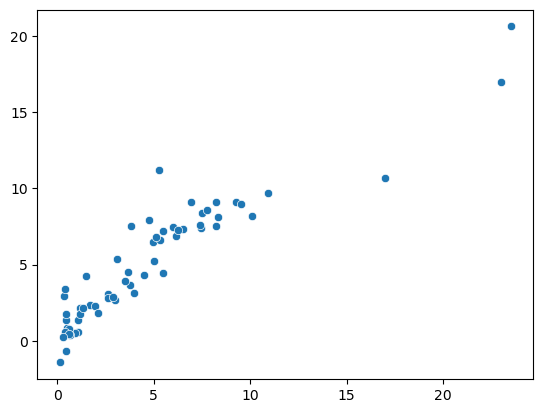

In [188]:
sns.scatterplot(y_test, y_pred);


In [189]:
lr_df = pd.DataFrame({"Ac":y_test, "pre":y_pred})
lr_df.head()

,Ac,pre
0,0.35,2.955343
1,10.11,8.178939
2,4.95,6.454273
3,0.15,-1.424175
4,6.95,9.088899


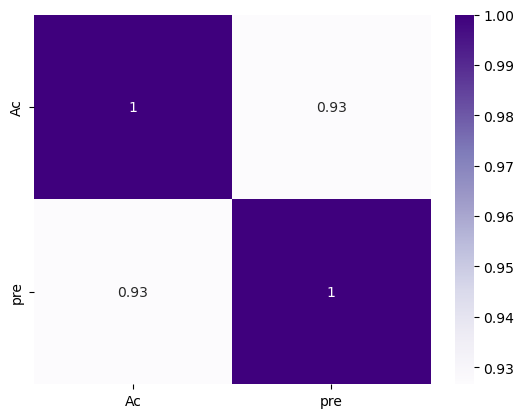

In [190]:
sns.heatmap(lr_df.corr(), annot=True, cmap="Purples");

In [191]:
print(f"The accuracy using the Linear Regression is {round(r2_score(y_test, y_pred)*100)}%")

The accuracy using the Linear Regression is 85%


## Decision Tree Regression
### Choosing the Model and fitting the model


In [192]:
X_dr = df.iloc[:,1:]
y_dr = df.iloc[:,0]

In [193]:
from sklearn.tree import DecisionTreeRegressor

In [194]:
model_dr = DecisionTreeRegressor()
model_dr.fit(X_train, y_train)

DecisionTreeRegressor()

### Feature Selection / Features Importance

In [195]:
model_dr.feature_importances_

array([9.09669829e-01, 2.48941683e-02, 1.02736684e-04, 5.77666174e-02,
       1.23427338e-04, 4.79102332e-03, 2.33208007e-04, 2.41899038e-03])

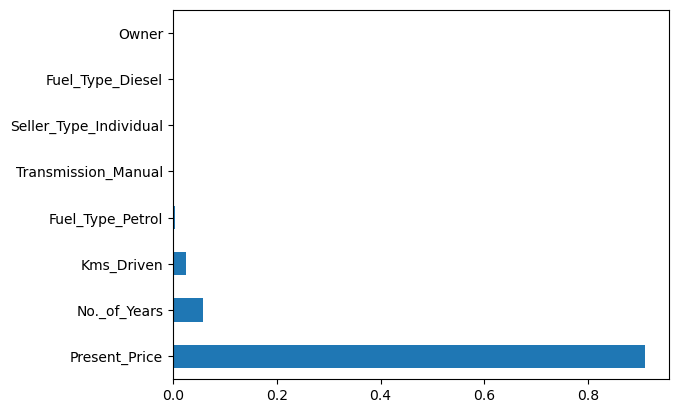

In [196]:
imp = pd.Series(model_dr.feature_importances_, index=X_dr.columns)
imp.nlargest(8).plot(kind='barh');
plt.show()

### Prediction

In [217]:
y_pred1 = model_dr.predict(X_test)

In [218]:
y_pred1

array([ 0.5 , 11.25,  4.1 ,  0.2 ,  7.05,  6.45,  1.11,  0.5 ,  0.48,
        7.5 ,  7.25,  1.25,  6.7 ,  0.45,  4.75,  2.35,  1.25, 14.25,
        0.48,  1.65,  0.25,  9.1 ,  4.5 ,  2.35,  0.45,  2.9 ,  5.25,
        3.1 ,  1.15,  1.15,  0.25, 11.25,  0.45,  2.25,  7.75,  4.4 ,
        5.85,  7.45,  2.55,  7.05,  3.6 ,  2.75,  5.3 ,  0.6 ,  5.95,
        0.65,  8.5 ,  4.35,  3.1 ,  2.95,  4.75,  1.45, 23.  , 20.75,
        6.45,  9.15,  5.25,  7.75,  2.65,  6.4 ,  0.25])

In [219]:
y_test

array([ 0.35, 10.11,  4.95,  0.15,  6.95,  7.45,  1.1 ,  0.5 ,  0.45,
        6.  ,  9.25,  1.1 ,  7.5 ,  0.4 ,  6.15,  2.65,  0.95, 17.  ,
        0.48,  1.7 ,  0.42,  8.35,  5.35,  3.  ,  0.6 ,  3.75,  5.  ,
        2.65,  1.2 ,  1.2 ,  0.65,  8.25,  0.45,  1.95,  7.75,  3.65,
        5.5 ,  3.8 ,  2.9 ,  4.75,  3.51,  1.5 ,  4.5 ,  0.42,  6.5 ,
        0.6 ,  6.25,  5.25,  4.  ,  3.1 ,  5.11,  1.35, 23.5 , 23.  ,
        8.25, 10.9 ,  5.5 ,  9.5 ,  2.1 ,  7.4 ,  0.3 ])

In [229]:
dr_df = pd.DataFrame({"Actual": y_test, 'Predicted': y_pred1})
dr_df.head()

,Actual,Predicted
0,0.35,0.50
1,10.11,11.25
2,4.95,4.10
3,0.15,0.20
4,6.95,7.05


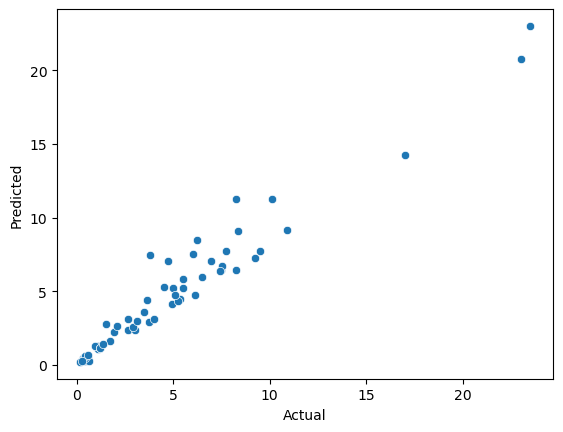

In [244]:
sns.scatterplot(dr_df.Actual, dr_df.Predicted);

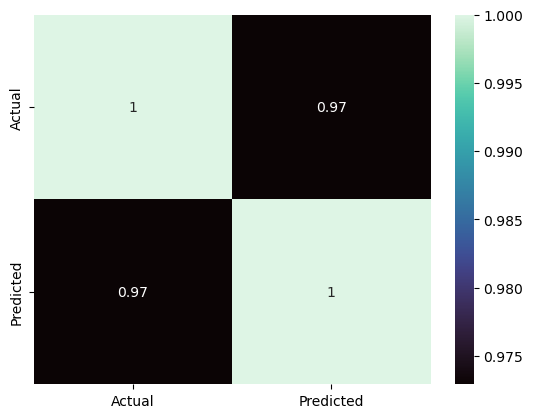

In [245]:
sns.heatmap(dr_df.corr(),annot=True,cmap ='mako');

In [234]:
print(f"The accuracy using the Linear Regression is {r2_score(y_test, y_pred1)*100}")

The accuracy using the Linear Regression is 94.55318116077378


## RandomForest Regression
### Choosing the Model and fitting the model


In [236]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [237]:
y_pred_fr = model_rf.predict(X_test)

In [238]:
y_pred_fr

array([ 0.4502, 10.8508,  4.8125,  0.2223,  7.5778,  6.3065,  1.1041,
        0.5819,  0.4757,  6.819 ,  7.7924,  1.1033,  8.4516,  0.4551,
        5.5145,  2.6955,  1.1521, 14.4278,  0.4783,  1.583 ,  0.353 ,
        8.0754,  4.722 ,  2.766 ,  0.5095,  3.5035,  5.3975,  3.1295,
        1.2039,  1.1828,  0.4018,  9.8085,  0.459 ,  2.5255,  7.7874,
        4.2295,  6.2525,  6.6116,  2.6655,  6.9369,  4.2915,  3.4566,
        5.016 ,  0.5646,  6.11  ,  0.8084,  8.364 ,  7.241 ,  2.913 ,
        3.6   ,  5.0015,  1.53  , 21.7876, 20.4496,  6.371 , 10.4209,
        5.1255,  9.2947,  2.614 ,  6.858 ,  0.2509])

In [241]:
fr_df = pd.DataFrame({"Actual": y_test, 'Predicted': y_pred_fr})
fr_df.head()

,Actual,Predicted
0,0.35,0.4502
1,10.11,10.8508
2,4.95,4.8125
3,0.15,0.2223
4,6.95,7.5778


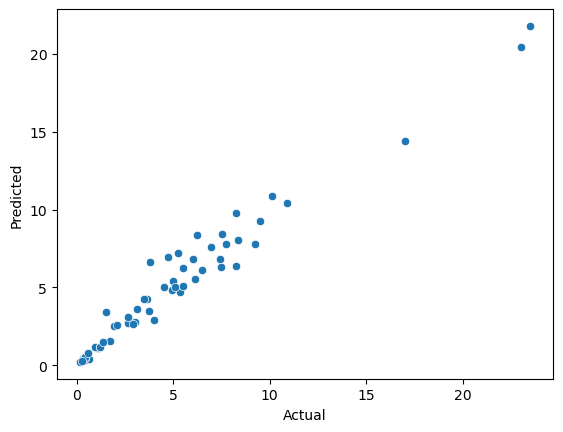

In [243]:
sns.scatterplot(fr_df.Actual, fr_df.Predicted);

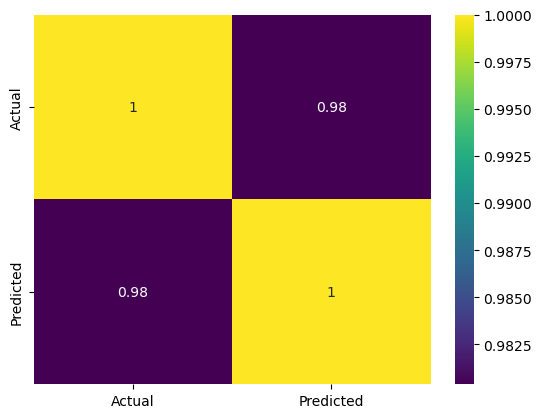

In [247]:
sns.heatmap(fr_df.corr(),annot=True, cmap = "viridis");

In [248]:
print(f"The accuracy using the Linear Regression is {r2_score(y_test, y_pred_fr)*100}")

The accuracy using the Linear Regression is 95.78007417619538
